# Fruits and Vegetables Image Classification System Project

# Importing Libraries

In [53]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

##  Training Image Preprocessing 

In [54]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Mohit Sharma/Downloads/DBDAProject/dataset/train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=64,
    image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 9198 files belonging to 36 classes.


## Validation Image Preprocessing

In [55]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Mohit Sharma/Downloads/DBDAProject/dataset/validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 685 files belonging to 36 classes.


# Building the Model

In [56]:
 cnn = tf.keras.models.Sequential()

## Building Convolutional Layer

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [58]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [59]:
cnn.add(tf.keras.layers.Flatten())

In [60]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu')) #512 Neurons will run on relu Activation Function

In [61]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu')) #256 Neurons will run on relu Activation Function

In [62]:
cnn.add(tf.keras.layers.Dropout(0.5)) # We are dropping some Neurons to avoid Overfitting

In [63]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) # Output Layer

# Compiling & Training Phase 

In [64]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - accuracy: 0.3700 - loss: 13.7226 - val_accuracy: 0.4905 - val_loss: 1.9179
Epoch 2/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 37s 253ms/step - accuracy: 0.7182 - loss: 1.0611 - val_accuracy: 0.5942 - val_loss: 1.5553
Epoch 3/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 37s 252ms/step - accuracy: 0.7582 - loss: 0.8891 - val_accuracy: 0.6117 - val_loss: 1.3992
Epoch 4/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 40s 275ms/step - accuracy: 0.7950 - loss: 0.7250 - val_accuracy: 0.6613 - val_loss: 1.3087
Epoch 5/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 240ms/step - accuracy: 0.8266 - loss: 0.6264 - val_accuracy: 0.7226 - val_loss: 1.2137
Epoch 6/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.8587 - loss: 0.4802 - val_accuracy: 0.7489 - val_loss: 1.2078
Epoch 7/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 36s 246ms/step - accuracy: 0.8888 - loss: 0.3679 - val_accuracy: 0.7285 - val_loss: 1.2521
Epoch 8/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 37s 253ms/step - accuracy: 0.9098 - loss: 

# Saving Model

In [67]:
cnn.save('trained_model.h5')

In [68]:
training_history.history #Return Dictionary of History

{'accuracy': [0.5571863651275635,
  0.7325505614280701,
  0.7722330689430237,
  0.8099586963653564,
  0.8342030644416809,
  0.8707327842712402,
  0.9019352197647095,
  0.9170472025871277,
  0.9411828517913818,
  0.9564035534858704,
  0.9654272794723511,
  0.949662983417511,
  0.9666231870651245,
  0.9689062833786011,
  0.9759730100631714],
 'loss': [4.245916843414307,
  0.9886893630027771,
  0.8310863375663757,
  0.6731081604957581,
  0.5906779170036316,
  0.4350159764289856,
  0.3272726833820343,
  0.2776455283164978,
  0.19204126298427582,
  0.16120991110801697,
  0.12216783314943314,
  0.168972447514534,
  0.12234318256378174,
  0.10738725960254669,
  0.09648816287517548],
 'val_accuracy': [0.4905109405517578,
  0.5941605567932129,
  0.6116788387298584,
  0.6613138914108276,
  0.7226277589797974,
  0.7489051222801208,
  0.7284671664237976,
  0.7591241002082825,
  0.7532846927642822,
  0.7737226486206055,
  0.7591241002082825,
  0.7357664108276367,
  0.75620436668396,
  0.72846716642

In [69]:
# Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [70]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Calculating Accuracy of Model Achieved on Validation Set

In [71]:
print("Validation Set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy: 75.32846927642822 %


In [72]:
print("Training Set Accuracy: {} %" .format(training_history.history['accuracy'][-1]*100))

Training Set Accuracy: 97.59730100631714 %


# Accuracy Visualization

## Training Visualization

In [73]:
training_history.history['accuracy'] # Accuracy for Training Set for each epochs

[0.5571863651275635,
 0.7325505614280701,
 0.7722330689430237,
 0.8099586963653564,
 0.8342030644416809,
 0.8707327842712402,
 0.9019352197647095,
 0.9170472025871277,
 0.9411828517913818,
 0.9564035534858704,
 0.9654272794723511,
 0.949662983417511,
 0.9666231870651245,
 0.9689062833786011,
 0.9759730100631714]

# Visualization before Tuning the Model

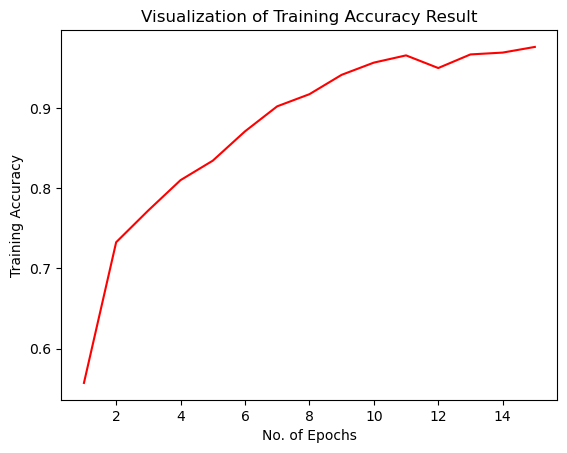

In [74]:
# This is Training Accuracy Visualization of our Previous Model for Underfitted Model

epoch = [i for i in range(1,16)]
plt.plot(epoch,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

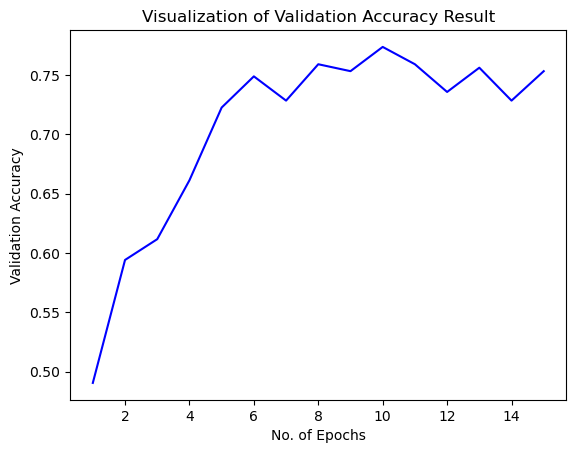

In [75]:
# This is Validation Accuracy Visualization of our Previous Model for Underfitted Model

plt.plot(epoch,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

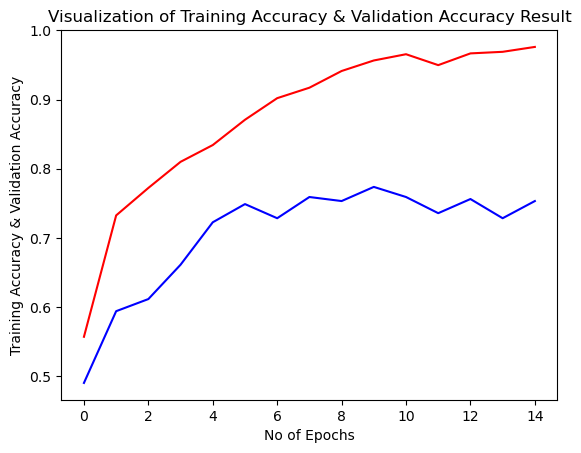

In [76]:
# Visualization of Training Accuracy & Validation Accuracy Result when Model is Overfitted

epochs=[i for i in range (1,40)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.show()

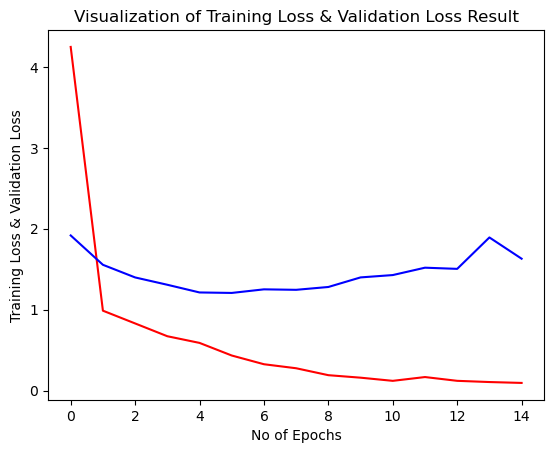

In [77]:
# Visualization of Training Loss & Validation Loss Result when Model is Overfitted

plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.show()

# Visualization After Tuning The Model

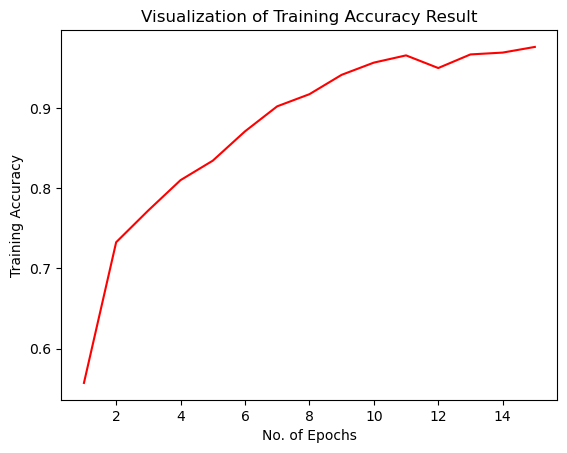

In [78]:
# This is Training Accuracy Visualization of our Model after doing correction in Model

epoch = [i for i in range(1,16)] # Here we have used 32 epochs
plt.plot(epoch,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

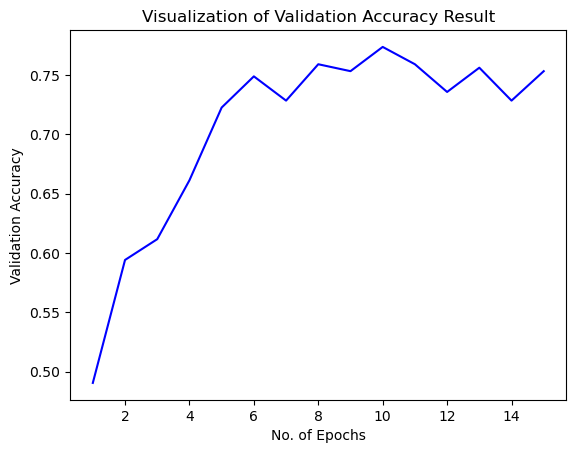

In [79]:
# This is Validation Accuracy Visualization of our Model after doing correction in Model

plt.plot(epoch,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

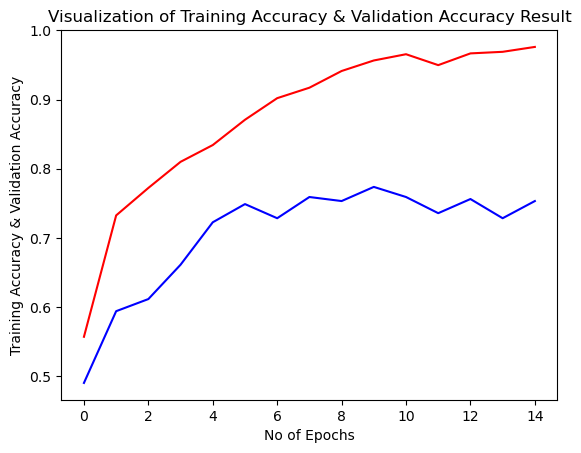

In [80]:
# Visualization of Training Accuracy & Validation Accuracy Result after doing correction in Model Accuracy

epochs=[i for i in range (1,33)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.show()

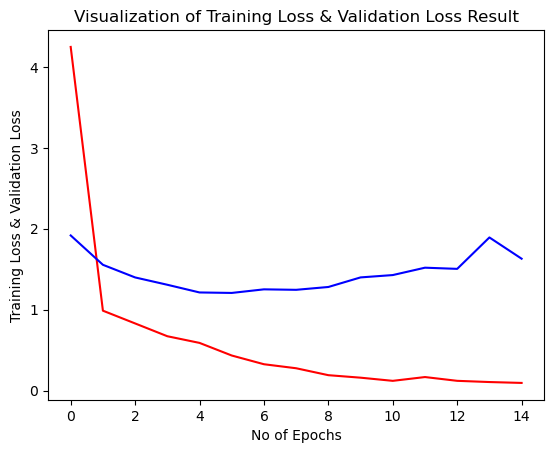

In [81]:
# Visualization of Training loss & Validation loss Result after doing correction in Model Accuracy

plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.show()

# Evaluating CNN Model

In [82]:
Training_loss,Training_accuracy=cnn.evaluate(training_set)

144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9899 - loss: 0.0347


In [83]:
Val_loss,Val_accuracy=cnn.evaluate(validation_set)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7376 - loss: 1.7626


# Loading Model

In [84]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Mohit Sharma/Downloads/DBDAProject/dataset/test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)

Found 719 files belonging to 36 classes.


In [85]:
Test_loss,Test_accuracy=cnn.evaluate(test_set)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7669 - loss: 1.6428


In [86]:
cnn = tf.keras.models.load_model('trained_model.h5')

## Visualization and Performing Prediction on Single Image 

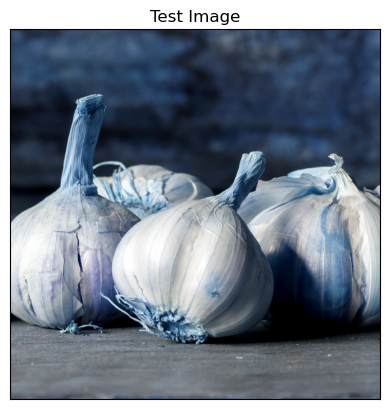

In [87]:
import cv2
image_path = r"C:\Users\Mohit Sharma\Downloads\DBDAProject\dataset\test\garlic\Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [88]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Converting Single Image into batch because our Model build in 2d Array
prediction = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [89]:
print(prediction)
print(max(prediction[0]))

[[1.01889623e-12 2.83284667e-08 9.78446990e-10 9.26215823e-14
  5.46023600e-12 4.40202210e-13 1.78771234e-10 7.76238176e-06
  1.61432031e-11 4.66398431e-09 1.53823430e-11 4.47965842e-09
  9.99992013e-01 2.81138579e-08 1.60564645e-10 7.37774981e-14
  5.62604824e-11 2.18559754e-10 2.19632909e-10 1.80012071e-12
  4.66953010e-09 1.83254037e-11 2.14413712e-11 4.73415918e-10
  2.27133562e-14 3.15495990e-10 3.79673680e-12 3.95548234e-08
  5.59363578e-08 4.34615055e-09 1.69265558e-14 8.26366475e-10
  2.22685017e-08 6.01474003e-13 1.13642095e-07 6.88286437e-15]]
0.999992


In [90]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [91]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

12


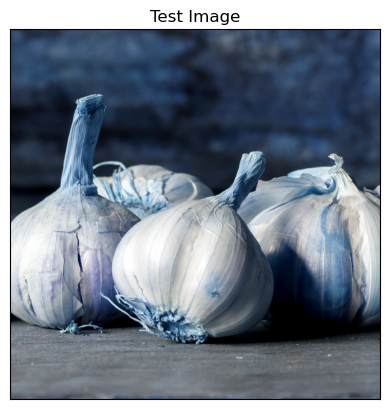

In [92]:
# Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [93]:
# Single prediction 
print('It is a {}'.format(test_set.class_names[result_index[0][0]]))

It is a garlic


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


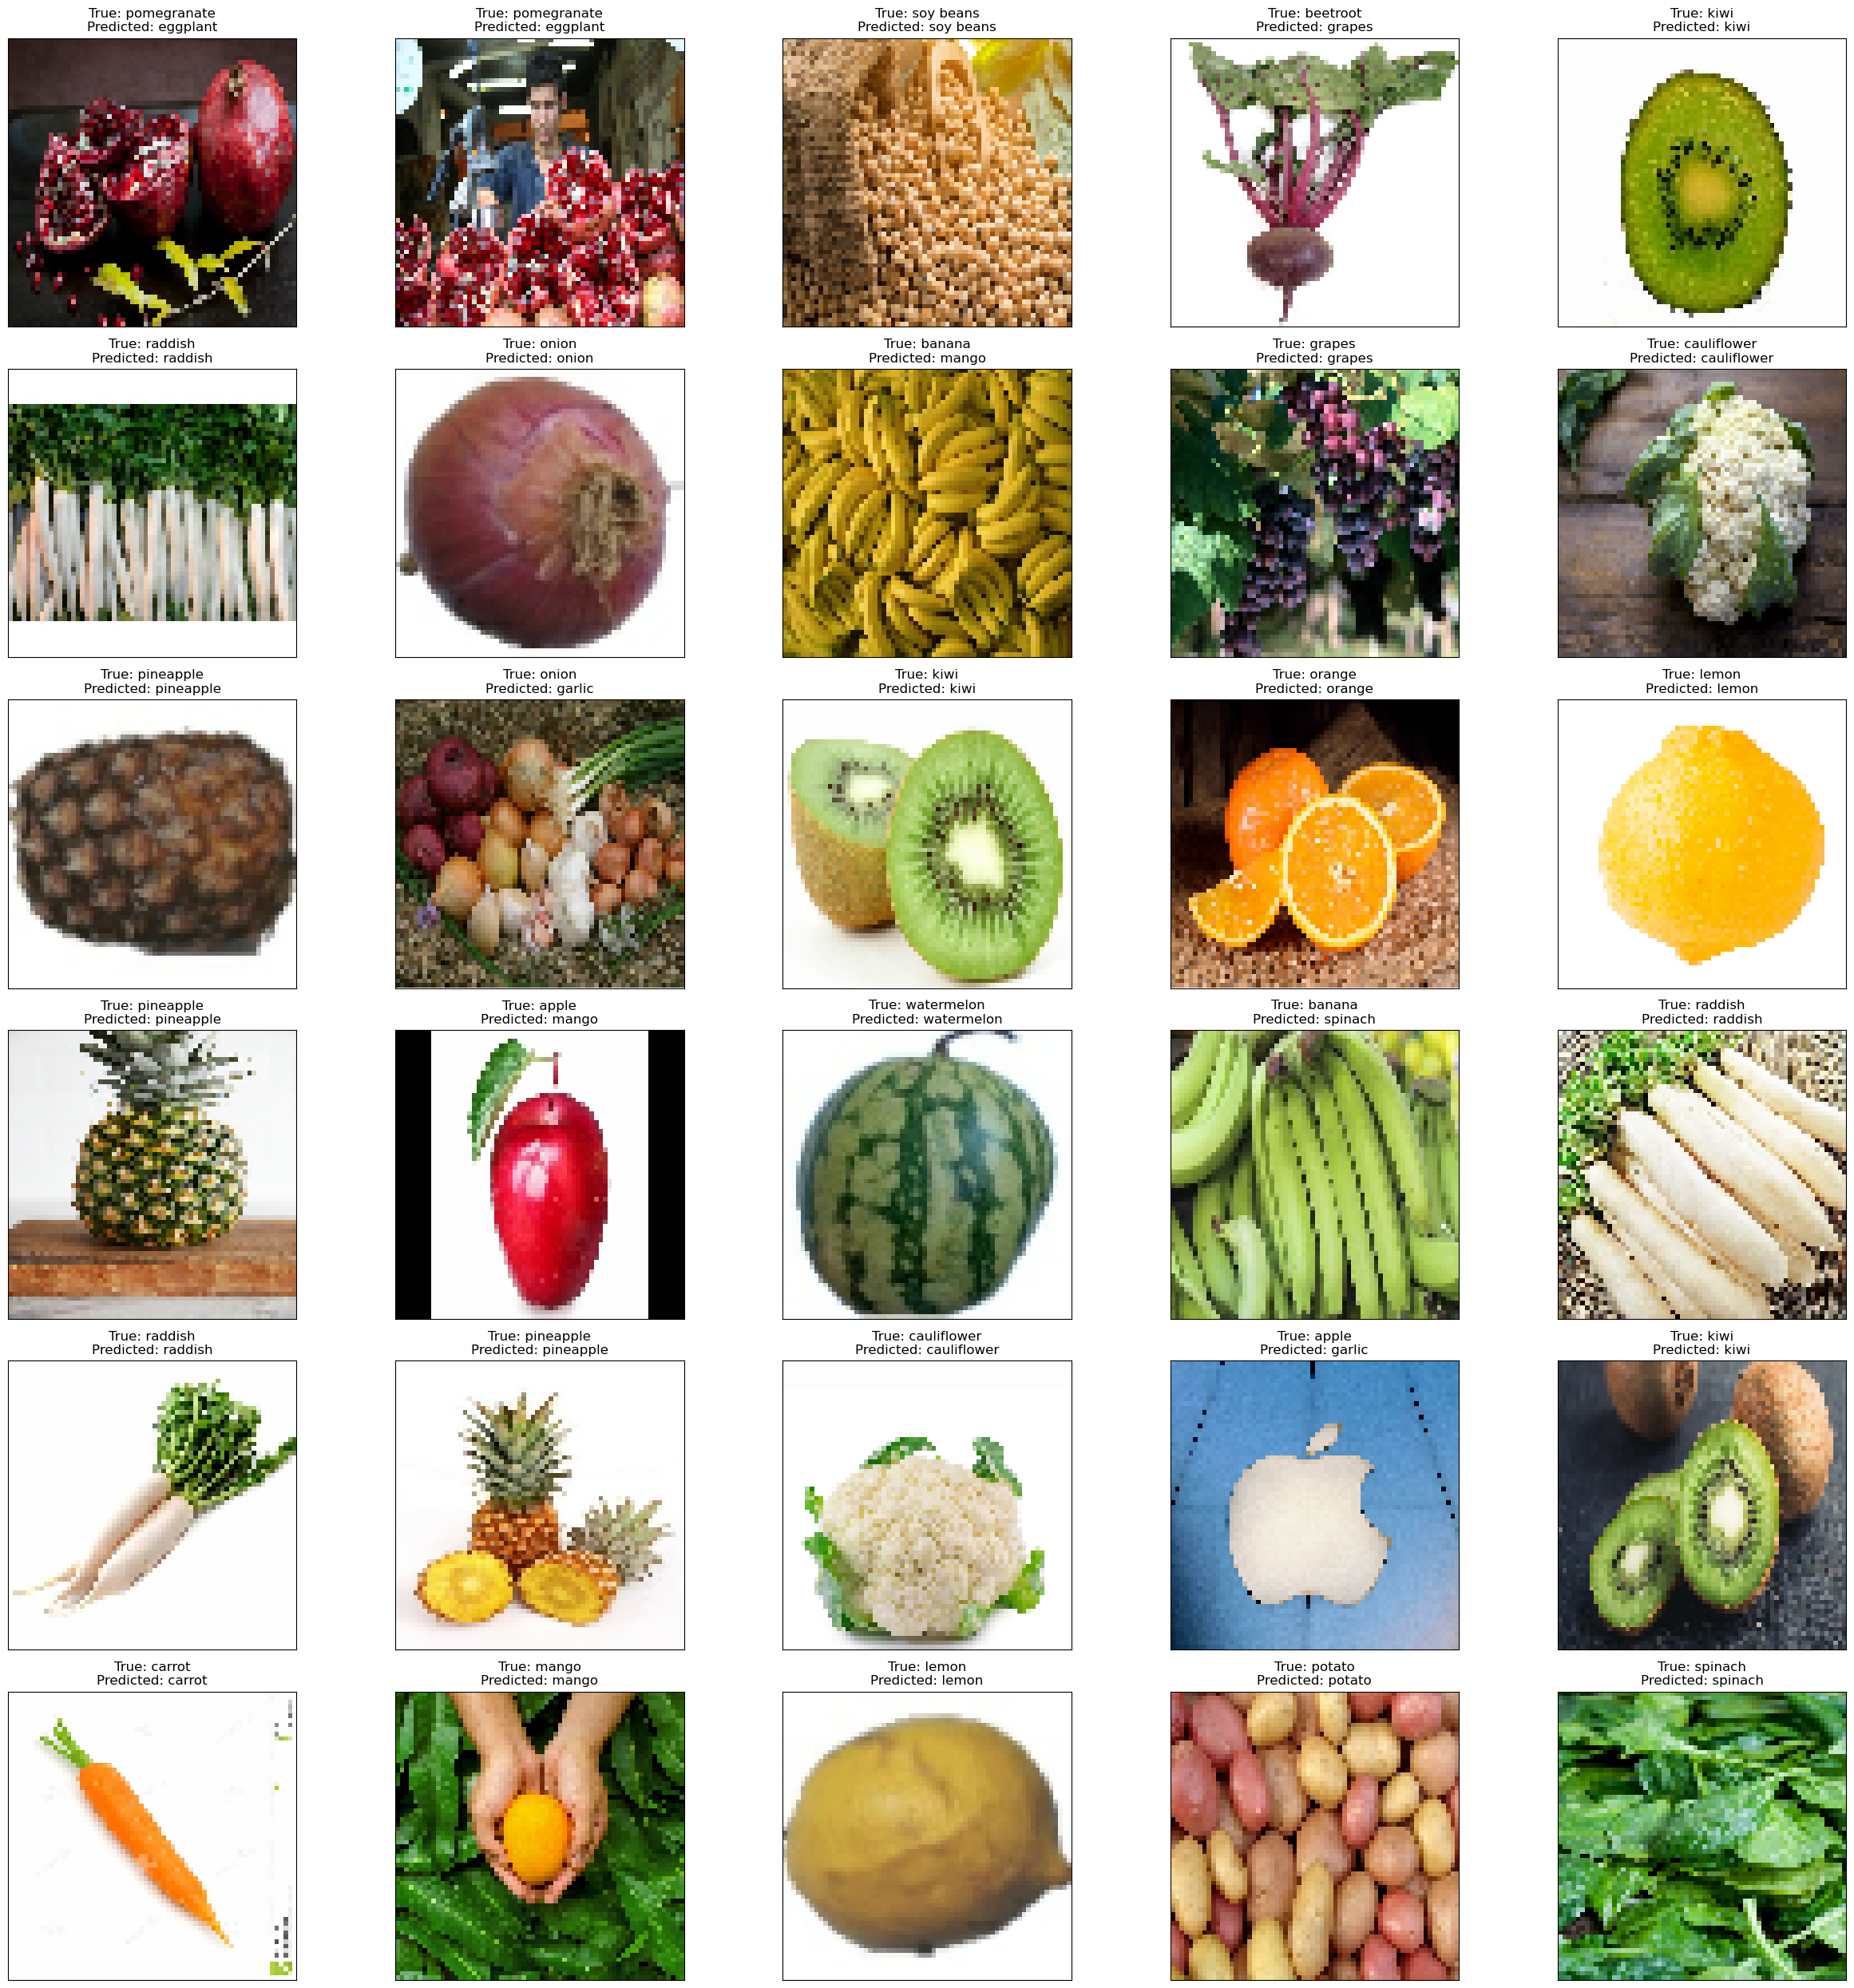

In [94]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 36
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()